# Q&A Activity Question Week -06

1. Find out how many countries are there in the dataset.
2. Examine the data by using visualizations.
3. Find out how many countries with respect to the region are available in the dataset
4. On average which region has the highest

    a. GDP per capita (current US$)
    
    b. International trade: Imports (million US$)
    
5. Find out which region has more consistent with respect to GDP per capita (current US$)

In [115]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import warnings
warnings.filterwarnings("ignore")

In [116]:
#reading the csv  file containing the dataset
df=pd.read_excel("Dataset_w6.xlsx")
pd.set_option('display.max_rows', df.shape[0]+1)
df

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
5,Argentina,SouthAmerica,2780400.0,44271.0,14564.5,119.0,55610.0
6,Armenia,WesternAsia,29743.0,2930.0,3489.1,135.0,3230.0
7,Australia,Oceania,7692060.0,24451.0,51352.2,111.0,189406.0
8,Austria,WesternEurope,83871.0,8736.0,44117.7,108.0,149299.0
9,Azerbaijan,WesternAsia,86600.0,9828.0,5438.7,131.0,8532.0


In [117]:
#checking for null values and displaying concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 7 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   country                                     196 non-null    object 
 1   Region                                      196 non-null    object 
 2   Surface area (km2)                          196 non-null    float64
 3   Population in thousands (2017)              196 non-null    float64
 4   GDP per capita (current US$)                196 non-null    float64
 5   Agricultural production index               196 non-null    float64
 6   International trade: Imports (million US$)  196 non-null    float64
dtypes: float64(5), object(2)
memory usage: 10.8+ KB


From the concise summary of the dataset we can see that there are no null values present in the dataset and there are 3 cloumns bearing integer values and 5 columns bearing string values present in the dataset. From the dataset we can also see that there are spaces present in 5 column names so we need to replace them with underscore.

In [118]:
#renaming the column names and hence replacing space(" ") by underscore("_")
column_names=df.columns
for column in column_names:
    new_name=column.replace(" ","_")
    df.rename(columns={column:new_name},inplace=True)

In [119]:
df

,country,Region,Surface_area_(km2),Population_in_thousands_(2017),GDP_per_capita_(current_US$),Agricultural_production_index_,International_trade:_Imports_(million_US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
5,Argentina,SouthAmerica,2780400.0,44271.0,14564.5,119.0,55610.0
6,Armenia,WesternAsia,29743.0,2930.0,3489.1,135.0,3230.0
7,Australia,Oceania,7692060.0,24451.0,51352.2,111.0,189406.0
8,Austria,WesternEurope,83871.0,8736.0,44117.7,108.0,149299.0
9,Azerbaijan,WesternAsia,86600.0,9828.0,5438.7,131.0,8532.0


In [120]:
#displaying the discriptive  statistics of the dataset.
df.describe()

,Surface_area_(km2),Population_in_thousands_(2017),GDP_per_capita_(current_US$),Agricultural_production_index_,International_trade:_Imports_(million_US$)
count,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02
mean,6.787071e+05,3.796658e+04,13727.343367,117.066327,7.996138e+04
std,1.914200e+06,1.434228e+05,18995.593914,25.521247,2.340416e+05
min,2.600000e+01,5.000000e+00,144.500000,34.000000,1.200000e+01
25%,2.084900e+04,1.462000e+03,1840.725000,102.000000,2.162500e+03
50%,1.136275e+05,7.677500e+03,5463.450000,114.000000,8.255500e+03
75%,5.077380e+05,2.624075e+04,15849.550000,133.250000,4.612275e+04
max,1.709825e+07,1.409517e+06,100160.800000,199.000000,2.249661e+06


In [121]:
#displaying the discriptive  statistics of the dataset reardless of the datatype.
df.describe(include="all")

,country,Region,Surface_area_(km2),Population_in_thousands_(2017),GDP_per_capita_(current_US$),Agricultural_production_index_,International_trade:_Imports_(million_US$)
count,196,196,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02
unique,196,22,NaN,NaN,NaN,NaN,NaN
top,Afghanistan,WesternAsia,NaN,NaN,NaN,NaN,NaN
freq,1,18,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,6.787071e+05,3.796658e+04,13727.343367,117.066327,7.996138e+04
std,NaN,NaN,1.914200e+06,1.434228e+05,18995.593914,25.521247,2.340416e+05
min,NaN,NaN,2.600000e+01,5.000000e+00,144.500000,34.000000,1.200000e+01
25%,NaN,NaN,2.084900e+04,1.462000e+03,1840.725000,102.000000,2.162500e+03
50%,NaN,NaN,1.136275e+05,7.677500e+03,5463.450000,114.000000,8.255500e+03
75%,NaN,NaN,5.077380e+05,2.624075e+04,15849.550000,133.250000,4.612275e+04


# 1. Find out how many countries are there in the dataset.

In [122]:
df.country.nunique()

196

From the above output there are 196 countries present in the provided data set.

# 3. Find out how many countries with respect to the region are available in the dataset


In [123]:
df.groupby('Region')['country'].nunique()

Region
Caribbean            16
CentralAmerica        8
CentralAsia           5
EasternAfrica        17
EasternAsia           7
EasternEurope        10
Melanesia             5
Micronesia            4
MiddleAfrica          9
NorthernAfrica        5
NorthernAmerica       4
NorthernEurope       10
Oceania               2
Polynesia             5
South-easternAsia    11
SouthAmerica         12
SouthernAfrica        5
SouthernAsia          9
SouthernEurope       12
WesternAfrica        15
WesternAsia          18
WesternEurope         7
Name: country, dtype: int64

The above output shows the number of countries per region in the dataset

# 4. On average which region has the highest 


<h3>a. GDP per capita (current US$)
                   
b. International trade: Imports (million US$)</h3>

In [124]:
#Calculating the maximum value of the average when grouped by gender
df.groupby('Region')['GDP_per_capita_(current_US$)'].mean()


Region
Caribbean            15135.562500
CentralAmerica        6348.137500
CentralAsia           4329.880000
EasternAfrica         2088.852941
EasternAsia          27967.614286
EasternEurope         9292.490000
Melanesia             9261.960000
Micronesia            5008.300000
MiddleAfrica          3928.833333
NorthernAfrica        3934.960000
NorthernAmerica      57659.000000
NorthernEurope       42098.220000
Oceania              44823.250000
Polynesia             8686.520000
South-easternAsia    10299.027273
SouthAmerica          8499.775000
SouthernAfrica        4191.900000
SouthernAsia          2968.400000
SouthernEurope       14462.741667
WesternAfrica         1013.140000
WesternAsia          17013.938889
WesternEurope        55387.128571
Name: GDP_per_capita_(current_US$), dtype: float64

In [125]:
df.groupby('Region')['GDP_per_capita_(current_US$)'].mean().max()

57659.0

From the above outputs we can see that the highest average is "57659.0" and the region which bears this average is Northern America

# 5. Find out which region has more consistent with respect to GDP per capita (current US$)

In [126]:
df.groupby('Region')['GDP_per_capita_(current_US$)'].var()

Region
Caribbean            2.125581e+08
CentralAmerica       1.747609e+07
CentralAsia          1.724089e+07
EasternAfrica        1.380964e+07
EasternAsia          7.554319e+08
EasternEurope        2.932752e+07
Melanesia            1.919844e+08
Micronesia           2.323886e+07
MiddleAfrica         2.782400e+07
NorthernAfrica       9.500529e+05
NorthernAmerica      6.630429e+08
NorthernEurope       4.272915e+08
Oceania              8.525438e+07
Polynesia            4.838942e+07
South-easternAsia    2.660752e+08
SouthAmerica         1.826457e+07
SouthernAfrica       4.741729e+06
SouthernAsia         8.155069e+06
SouthernEurope       9.104410e+07
WesternAfrica        6.643805e+05
WesternAsia          3.538970e+08
WesternEurope        6.135761e+08
Name: GDP_per_capita_(current_US$), dtype: float64

In [127]:
df.groupby('Region')['GDP_per_capita_(current_US$)'].var().min()

664380.5097142856

We can see that the minimum variance of  GDP per capita(current US$) is 664380.5097142856 which is for the region Western Africa.

# 2. Examine the data by using visualizations.

<AxesSubplot:xlabel='Surface Area', ylabel='Density'>

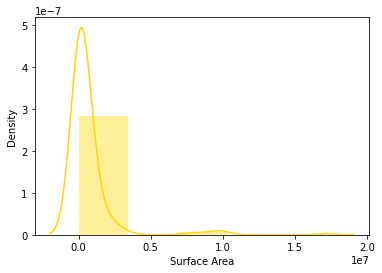

In [128]:
sns.distplot(df['Surface_area_(km2)'] , color="gold", axlabel='Surface Area',bins=5)

<AxesSubplot:xlabel='Population in Thousands(2017)', ylabel='Density'>

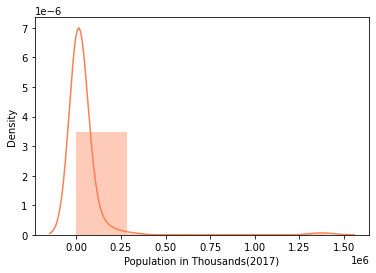

In [129]:
sns.distplot(df['Population_in_thousands_(2017)'] , color="coral", axlabel='Population in Thousands(2017)',bins=5)

<AxesSubplot:xlabel='GDP Per Capita(current US$)', ylabel='Density'>

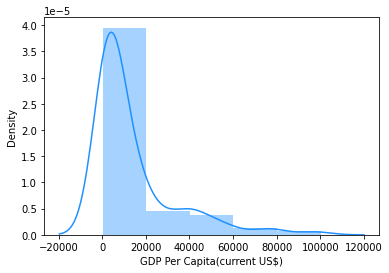

In [130]:
sns.distplot(df['GDP_per_capita_(current_US$)'] , color="dodgerblue", axlabel='GDP Per Capita(current US$)',bins=5)

<AxesSubplot:xlabel='Agricultural Productio Index', ylabel='Density'>

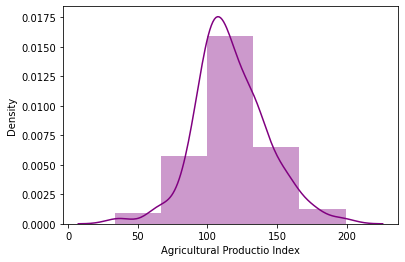

In [131]:
sns.distplot(df['Agricultural_production_index_'] , color="purple", axlabel='Agricultural Productio Index',bins=5)

<AxesSubplot:xlabel='International Trade: Imports(million US$)', ylabel='Density'>

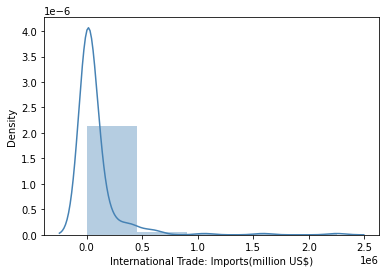

In [132]:
sns.distplot(df['International_trade:_Imports_(million_US$)'] , color="steelblue", axlabel='International Trade: Imports(million US$)',bins=5)

From the above visualizations we can see that only the Agricultural Productio Index is normally distributed and all others which include the surface area,population,GDP per capta and international trades: imports are all right skewed or positively skewed and the mean, median and mode of the following data are not equal i.e mean<median<mode.

<h3>Submitted by:
GROUP 8(Anand M Nair,Ashwanth V,Midhuna Prasad R, Shyma S, Zeenath M)</h3>